# <center>Laboratorium 3<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

Biblioteki niezbędne do wykonania zadania:

(instalacja: "pip install numpy scipy matplotlib memory_profiler")

In [1]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

%load_ext memory_profiler

***Materiały przygotowujące:***
- Standard IEEE 754 [PL](https://pl.wikipedia.org/wiki/IEEE_754) [EN](https://en.wikipedia.org/wiki/IEEE_754)
- Liczba zmiennoprzecinkowa [PL](https://pl.wikipedia.org/wiki/Liczba_zmiennoprzecinkowa) [EN](https://en.wikipedia.org/wiki/Floating-point_arithmetic)
- Arytmetyka zmiennoprzecinkowa [Python](https://docs.python.org/3.7/tutorial/floatingpoint.html)

***Profilowanie kodu:***
- [timeit](https://docs.python.org/2/library/timeit.html) - profilowanie czasu wykonywania kodu 
- [memit](https://pypi.org/project/memory-profiler/) - profilowanie pamięci zużywanej przez kod

Zarówno timeit jak i memit wspierają magic command w Jupyter notebook, co obrazuje poniższy przykład:

In [2]:
def func(size):
    a = np.random.random((size,size))
    b = np.random.random((size,size))
    c = a + b
    return c

for size in [100, 1000]:
    print('SIZE: ', size)
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o func(size)
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe
    print('Memory usage: ')
    %memit func(size)
    print('\n')

SIZE:  100
Timing: 
175 µs ± 47.3 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 92.88 MiB, increment: 0.20 MiB


SIZE:  1000
Timing: 
18.6 ms ± 646 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 115.84 MiB, increment: 22.90 MiB




***Zadanie 1.***  
Zaimplementuj funkcje obliczające błąd względny i bezwzględny (*relative_error* i *absolut_error*).
Funkcje przyjmują 2 argumenty: wartość dokładną oraz wartość przybliżoną, zwracając wartość błędu.
Implementacja powinna obsługiwać zarówno wartości skalarne, listy oraz wektory i macierze typu np.array z zachowaniem zasad [broadcastingu](https://numpy.org/doc/stable/user/basics.broadcasting.html).

**Wskazówka** Wykorzystuj funkcje *relative_error* i *absolut_error* w dalszej części laboratorium do analizy błędów.

***Zadanie 2.***  
Zaimplementuj funkcje *p_diff*, która przyjmuje jako parametry wartości całkowite $n$ i rzeczywiste $c$ oraz zwraca różnicę (co do wartości bezwzględnej)   dwóch wyrażeń $P_1$ oraz $P_2$:  
  
a) $P_1 = b - b + c $  
b) $P_2 = b + c - b $  
  
gdzie $b = 2^n$

Analizując różnicę w otrzymanych wynikach zastosuj warotści:  
- $n \in \{1,2,3... 50\}$
- $c \in \{0.1, 0.125, 0.25, 0.33, 0.5, 0.6\}$
 
Następnie odpowiedź i zilustruj wykresami pytania:

1. Jaki wynik powinniśmy otrzymać?
2. Które z liczb mają skończoną a które nieskończoną reprezentację?    
3. Dlaczego wyniki się od siebie różnią?    
4. Jaki typ błędu tutaj występuje?
5. Czy istnieje możliwość poprawy działania tych wyrażeń, jeżeli tak to w jaki sposób?  


1. Zgodnie z prawem przemienności dodawania i odejmowania w ciele liczb rzeczywistych wartości P1 i P2 są identyczne, a więc ich różnica za każdym razem powinna wynosić 0.
2. Liczby naturalne posiadają skończoną reprezentację ponieważ każdą z nich można przedstawić jako sumę kolejnych potęg liczby 2 przemnożonych przez 1 lub 0, natomiast ułamki których nie da się przedstawić jako sumy kolejnych ujemnych potęg liczby 2 przemnożonych przez 1 lub 0, posiadają nieskończoną reprezentację (w naszym przypdku 0.1, 0.33 i 0.6).
3. Wyniki różnią się od siebie z uwagi na ograniczoną liczbę bitów przeznaczoną na reprezentowanie liczby w systemie binarnym. Aby dokonać dodawania bardzo dużej liczby b do bardzo małej liczby c, należy obie liczby sprowadzić do wspólnego wykładnika. Wykładnik w reprezentacji dużej liczby np. 2^50 różni się o 54 od wykładnika małej liczby niereprezentowalnej w systemie binarnym, np. 0.1. Oznacza to, że po sprowadzeniu do wspólnego wykładnika, mantysa liczby 0.1 na którą przeznaczone jest jedynie 52 bity zostanie w zupełności obcięta skutkując błędem 0.1. Gdy różnica w wykładnikach będzie mniejsza, obcięta zostanie mniejsza część mantysy co objawi się mniejszym błędem aż do czasu gdy przybliżenie będzie na tyle dobre, że błąd będzie pomijalnie mały (zilustrowane to zostało wykresem). Gdyby jednak zamiast liczby 0.1 wzięlibyśmy liczbę posiadającą skończoną reprezentację, np. 0.25, podczas odejmowania obcięte zostaną jedynie zera mantysy co nie będzie skutkowało błędem (wykresy z linią prostą poniżej)(chyba, że utniemy też część jej niezerowej reprezentacji - wykres 2).
4. Występuje tutaj błąd reprezentacji i błąd zaokrąglenia.
5. Można poprawić dokładność wyrażenia stosując typ danych reprezentujących liczbę na większej liczbie bitów co będzie skutkowało mniejszym błędem reprezentacji i mniejszym błędem zaokrąglenia (obcięte zostaną jeszcze mniej znaczące bity). Aby znacząco zmniejszyć błędy zaokrąglenia można również dokonywać obliczeń w taki sposób aby zawsze dodawane bądź odejmowane były liczby różniące się o jak najmniejszą wartość (Dlatego P1 jest dokładne, nie licząc błędu reprezentacji, a P2 nie).

Mantysa i wykładnik liczby 2^50:  (0.5, 51)
Mantysa i wykładnik liczby 0.1:  (0.8, -3)


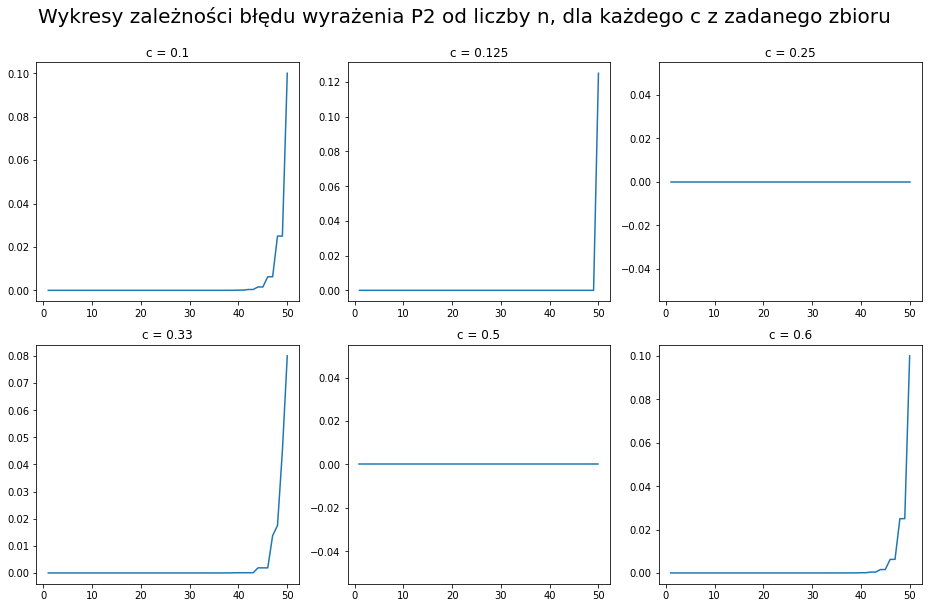

In [3]:
print('Mantysa i wykładnik liczby 2^50: ',np.frexp(2**50))
print('Mantysa i wykładnik liczby 0.1: ',np.frexp(0.1))
a = []
b = []
c = []
d = []
e = []
f = []
for i in range (1,51):
    x = main.p_diff(i,0.1)
    a.append(x)
for i in range (1,51):
    x = main.p_diff(i,0.125)
    b.append(x)
for i in range (1,51):
    x = main.p_diff(i,0.25)
    c.append(x)
for i in range (1,51):
    x = main.p_diff(i,0.33)
    d.append(x)
for i in range (1,51):
    x = main.p_diff(i,0.5)
    e.append(x)
for i in range (1,51):
    x = main.p_diff(i,0.6)
    f.append(x)
x = np.arange(1,51)
fig, ax = plt.subplots(2,3,figsize=(13,8))
ax[0,0].plot(x,a)
ax[0,0].set_title('c = 0.1')
ax[0,1].plot(x,b)
ax[0,1].set_title('c = 0.125')
ax[0,2].plot(x,c)
ax[0,2].set_title('c = 0.25')
ax[1,0].plot(x,d)
ax[1,0].set_title('c = 0.33')
ax[1,1].plot(x,e)
ax[1,1].set_title('c = 0.5')
ax[1,2].plot(x,f)
ax[1,2].set_title('c = 0.6')
fig.tight_layout()
fig.suptitle('Wykresy zależności błędu wyrażenia P2 od liczby n, dla każdego c z zadanego zbioru', fontsize=20, y = 1.05)
plt.show()

***Zadanie 3.***  
Wartości funkcji $\mathrm{e}^{x}$ można obliczyć w przybliżeniu z szeregu Taylora w następujący sposób:  
  
$\mathrm{e}^{x} \approx \sum\limits_{i=0}^{N}{\cfrac{1}{i!}x^{i}}$ 
  
na podstawie przedstawionych informacji zaimplementuj funkcje *exponential* która oblicza $\mathrm{e}^{x}$ z zadaną dokładnością $N$. Porównaj działanie utworzonej funkcji z [numpy.exp](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp.html). Odpowiedz na pytania:  

1. Jaki typ błędu obrazuje omawiany przykład?
2. Dokonaj analizy błędów bezwzględnych i względnych w zależności od wartości $n$.

1. Omawiany przykład obrazuje błąd metody będący skutkiem niemocy algorytmu w wykonaniu pewnej operacji nieskończoną liczbę razy aby uzyskać dokładny wynik. Oczywiście błędy zaokrągleń i reprezentacji nadal występują jednak na potrzeby omawianego przykładu nie będą nas interesować.
2. Poniżej przedstawiono wykres przedstawiający eksponentę oraz jej przybliżoną postać dla dokładności N = 10 w przedziale od 0 do 10. Następnie przedstawiono dwa wykresy obrazujące błąd bezwzględny i względny funkcji exponential dla obliczenia e^10 w zależności od przyjmowanego stopnia dokładności N w przedziale od 0 do 25. Z wykresów można wywnioskować, że dobry stopień dokładności i błąd bliski 0 otrzymujemy dla stopnia dokładności równego około 20.

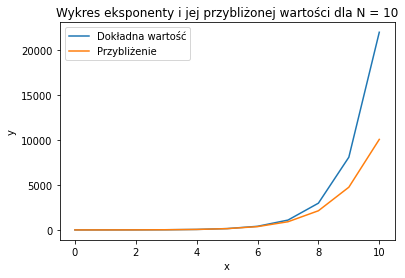

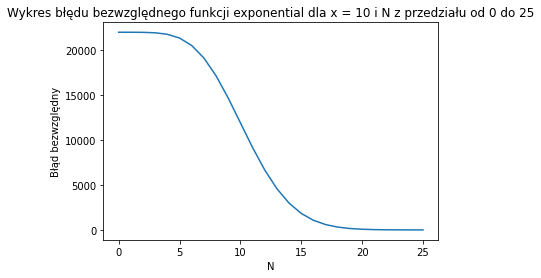

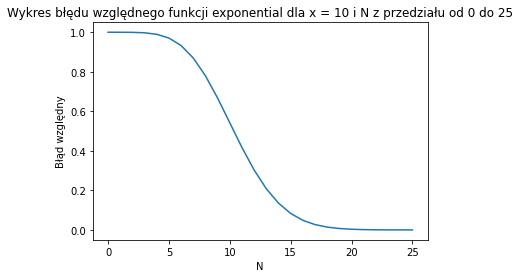

In [4]:
x = np.arange(11)
y_precise = np.exp(x)
y_aprox = []
for k in range(11):
    y_aprox.append(main.exponential(k,10))
plt.plot(x,y_precise, label = 'Dokładna wartość')
plt.plot(x,y_aprox, label = 'Przybliżenie')
plt.title('Wykres eksponenty i jej przybliżonej wartości dla N = 10')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
e_10 = np.exp(10)
x = np.arange(26)
e_10_with_error = []
for k in range(26):
    e_10_with_error.append(main.exponential(10,k))
plt.plot(x,main.absolut_error(e_10,e_10_with_error))
plt.title('Wykres błędu bezwzględnego funkcji exponential dla x = 10 i N z przedziału od 0 do 25')
plt.xlabel('N')
plt.ylabel('Błąd bezwzględny')
plt.show()
plt.plot(x,main.relative_error(e_10,e_10_with_error))
plt.title('Wykres błędu względnego funkcji exponential dla x = 10 i N z przedziału od 0 do 25')
plt.xlabel('N')
plt.ylabel('Błąd względny')
plt.show()

***Zadania 4.***  
Zaimplementuj 2 funkcje $coskx1$ i $coskx2$, realizujące rekurencyjnie przybliżanie wartości $cos(kx)$ w następujący sposób:

- Metoda 1:         
$cos(m+1)x = 2cosx \cdot cos(mx) - cos(m-1)x$
- Metoda 2:     
$cos(mx) = cosx \cdot cos(m-1)x - sinx \cdot sin(m-1)x$       
$sin(mx) = sinx \cdot cos(m-1)x + cosx \cdot sin(m-1)x$

Następnie przeanalizuj otrzymane rezultaty dla różnych $k$.

**Wskazówka** Do wyliczenia wartości $sin(x)$, $cos(x)$ (dla $k=1$) można użyć funkcji biblioteki numpy. 
Pozostałe wartości dla $k>1$ należy wyznaczyć rekurencyjnie.

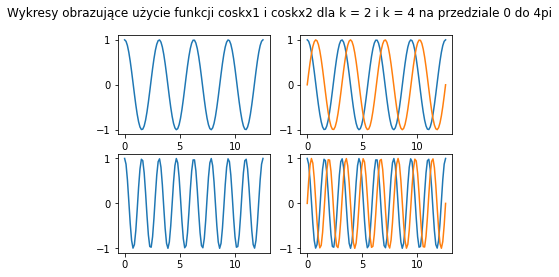

Cosinus(2*30) to:  -0.9524129804151563
Przybliżenie coskx1:  -0.9524129804151563
Przybliżenie coskx2:  (-0.9524129804151563, -0.3048106211022167)

Cosinus(20*3) to:  -0.9524129804151563
Przybliżenie coskx1:  -0.9524129804151578
Przybliżenie coskx2:  (-0.9524129804151559, -0.30481062110221646)


In [5]:
x = np.linspace(0,4*np.pi,100)
y = []
fig, ax = plt.subplots(2,2)
for i in x:
    y.append(main.coskx1(2,i))
ax[0,0].plot(x,y)
y = []
for i in x:
    y.append(main.coskx2(2,i))
ax[0,1].plot(x,y)
y = []
for i in x:
    y.append(main.coskx1(4,i))
ax[1,0].plot(x,y)
y = []
for i in x:
    y.append(main.coskx2(4,i))
ax[1,1].plot(x,y)
fig.suptitle('Wykresy obrazujące użycie funkcji coskx1 i coskx2 dla k = 2 i k = 4 na przedziale 0 do 4pi')
plt.show()
print('Cosinus(2*30) to: ',np.cos(2*30))
print('Przybliżenie coskx1: ',main.coskx1(2,30))
print('Przybliżenie coskx2: ',main.coskx2(2,30))
print('')
print('Cosinus(20*3) to: ',np.cos(20*3))
print('Przybliżenie coskx1: ',main.coskx1(20,3))
print('Przybliżenie coskx2: ',main.coskx2(20,3))

Wniosek:
Funkcja realizuje przybliżenie z bardzo dobrą dokładnością co może być spowodowane użyciem funkcji np.cos i np.sin z biblioteki numpy w implementacji, która jest podłożem stosu wartości obliczanych rekurencyjnie, przez co są one obarczone właściwie jedynie błędem zaokrąglenia i reprezentacji.

***Zadanie 5.***  
Wiedząc, że
$\begin{aligned}
\sum_{n=1}^{\infty} \cfrac{1}{n^2} = \cfrac{1}{6} \pi^2
\end{aligned}$,
napisz kod w Pythonie (funkcja *pi*) obliczający przybliżenie liczby pi (nie korzystaj ze stałych <i>numpy.pi</i>, <i>math.pi</i> itp.). 

1. Z jakimi rodzajami błędów numerycznych mamy tu do czynienia? 
2. Sporządź wykresy błędów bezwzględnych i względnych w stosunku do stałej numpy.pi w zależności od wartości $n$.  

**Wskazówka** Do wizualizacji wyników użyj skali logarytmicznej.

1. Omawiany przykład obrazuje błąd metody będący skutkiem niemocy algorytmu w wykonaniu pewnej operacji nieskończoną liczbę razy aby uzyskać dokładny wynik. W przykładzie mamy do cznienia również z błędami zaokrąglenia wynikacjącymi z charakteru przeprowadzanych obliczeń oraz z błędami reprezentacji wynikacjącymi z próby przedstawienia ułamków posiadających nieskończoną reprezentację w systemie binarnym.
2. Poniżej przedstawiono wykresy błędu bezwzględnego i względnego funkcji pi w zależności od przyjętej dokładności obliczeń n w skali logarytmicznej.

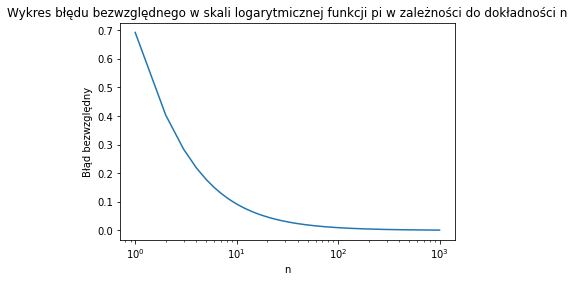

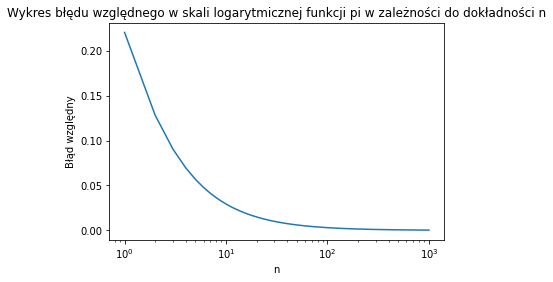

In [6]:
pi_precise = np.pi
x = np.arange(1,1001)
pi_error = []
for i in range (1,1001):
    pi_error.append(main.pi(i))
plt.semilogx(x,main.absolut_error(pi_precise,pi_error))
plt.title('Wykres błędu bezwzględnego w skali logarytmicznej funkcji pi w zależności do dokładności n')
plt.xlabel('n')
plt.ylabel('Błąd bezwzględny')
plt.show()
plt.semilogx(x,main.relative_error(pi_precise,pi_error))
plt.title('Wykres błędu względnego w skali logarytmicznej funkcji pi w zależności do dokładności n')
plt.xlabel('n')
plt.ylabel('Błąd względny')
plt.show()

***Zadanie 6.***  
Używając funkcji timeit oraz memit zbadaj czas działania oraz zużycie pamięci funkcji z Zadania 4 w zalożności od różnych wartości $n$.     
Sporządź wykresy:
- czasu obliczenia danego przybliżenia liczby pi w zależności od $n$. 
W tym celu wykorzystaj funkcje [errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) oraz zwracane przez *timeit* wartości średnie oraz ich odchylenie standardowe. 
- błędu bezwzględnego przybliżenia liczby pi od czasu jego wykonania.



**Wskazówka** Użyj opcji -o (output) dla *timeit* aby zapisać wynik do zmiennej. Opcje -r (runs) i -n (ilość pentli) decydują o ilości wykonanych prób.     
Do wizualizacji wyników użyj skali logarytmicznej.

In [7]:
print('Czas potrzebny na wykonanie i niezbędna ilość zasobów dla wykonania funkcji pi dla n = 1:')
time = %timeit -o main.pi(1)
memory = %memit -o main.pi(1)

Czas potrzebny na wykonanie i niezbędna ilość zasobów dla wykonania funkcji pi dla n = 1:
4.3 µs ± 110 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
peak memory: 106.80 MiB, increment: 0.04 MiB


In [8]:
print('Czas potrzebny na wykonanie i niezbędna ilość zasobów dla wykonania funkcji pi dla n = 10:')
time = %timeit -o main.pi(10)
memory = %memit -o main.pi(10)

Czas potrzebny na wykonanie i niezbędna ilość zasobów dla wykonania funkcji pi dla n = 10:
13.5 µs ± 183 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
peak memory: 106.80 MiB, increment: 0.00 MiB


In [9]:
print('Czas potrzebny na wykonanie i niezbędna ilość zasobów dla wykonania funkcji pi dla n = 100:')
time = %timeit -o main.pi(100)
memory = %memit -o main.pi(100)

Czas potrzebny na wykonanie i niezbędna ilość zasobów dla wykonania funkcji pi dla n = 100:
103 µs ± 2.29 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
peak memory: 106.80 MiB, increment: 0.00 MiB


In [10]:
print('Czas potrzebny na wykonanie i niezbędna ilość zasobów dla wykonania funkcji coskx1 i coskx2 dla k = 1 i x =10')
time = %timeit -o main.coskx1(1,10)
memory = %memit -o main.coskx1(1,10)
print('')
time = %timeit -o main.coskx2(1,10)
memory = %memit -o main.coskx2(1,10)

Czas potrzebny na wykonanie i niezbędna ilość zasobów dla wykonania funkcji coskx1 i coskx2 dla k = 1 i x =10
3.49 µs ± 40.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
peak memory: 106.74 MiB, increment: -0.06 MiB

19.7 µs ± 293 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
peak memory: 107.22 MiB, increment: 0.00 MiB


In [11]:
print('Czas potrzebny na wykonanie i niezbędna ilość zasobów dla wykonania funkcji coskx1 i coskx2 dla k = 5 i x = 2')
time = %timeit -o main.coskx1(5,2)
memory = %memit -o main.coskx1(5,2)
print('')
time = %timeit -o main.coskx2(5,2)
memory = %memit -o main.coskx2(5,2)

Czas potrzebny na wykonanie i niezbędna ilość zasobów dla wykonania funkcji coskx1 i coskx2 dla k = 5 i x = 2
58.9 µs ± 834 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
peak memory: 107.23 MiB, increment: 0.00 MiB

505 µs ± 1.65 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
peak memory: 107.23 MiB, increment: 0.00 MiB


In [12]:
print('Czas potrzebny na wykonanie i niezbędna ilość zasobów dla wykonania funkcji coskx1 i coskx2 dla k = 10 i x = 1')
time = %timeit -o main.coskx1(10,1)
memory = %memit -o main.coskx1(10,1)
print('')
time = %timeit -o main.coskx2(10,1)
memory = %memit -o main.coskx2(10,1)

Czas potrzebny na wykonanie i niezbędna ilość zasobów dla wykonania funkcji coskx1 i coskx2 dla k = 10 i x = 1
712 µs ± 6.17 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
peak memory: 107.23 MiB, increment: 0.00 MiB

16.8 ms ± 326 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
peak memory: 107.23 MiB, increment: 0.00 MiB


In [13]:
%%capture
n = np.arange(0,101)
time_avarage = []
time_stdev = []
pi_error = []
for i in range (0,101):
    x = %timeit -o -r 50 -n 100 main.pi(i)
    time_avarage.append(x.average)
    time_stdev.append(x.stdev)
    pi_error.append(main.pi(i))

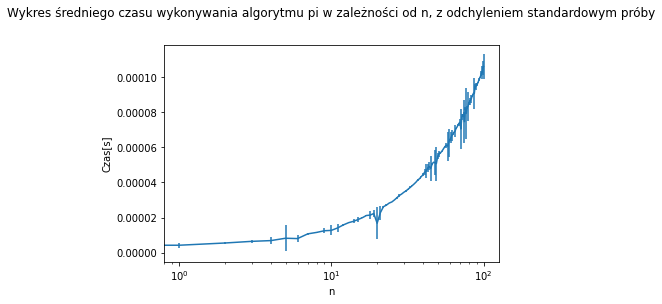

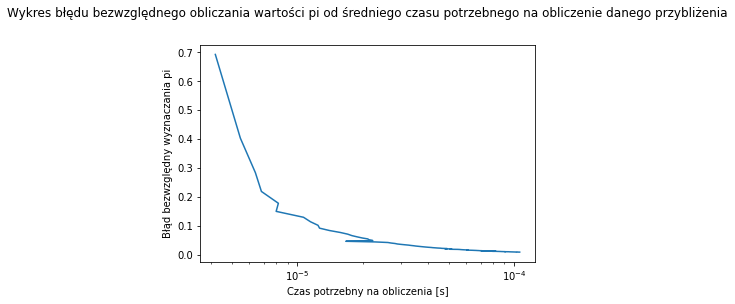

In [25]:
fig, ax = plt.subplots(1,1)
ax.errorbar(n,time_avarage, yerr = time_stdev)
ax.set_title('Wykres średniego czasu wykonywania algorytmu pi w zależności od n, z odchyleniem standardowym próby',y = 1.1)
ax.set_xscale('log')
ax.set_xlabel('n')
ax.set_ylabel('Czas[s]')
plt.show()
plt.semilogx(time_avarage,main.absolut_error(np.pi,pi_error))
plt.title('Wykres błędu bezwzględnego obliczania wartości pi od średniego czasu potrzebnego na'
          ' obliczenie danego przybliżenia',y = 1.1)
plt.ylabel('Błąd bezwzględny wyznaczania pi')
plt.xlabel('Czas potrzebny na obliczenia [s]')
plt.show()

Wniosek:
Jak można zaokserwować na wykresie, złożoność czasowa algorytmu pi, jest liniowa. Błąd bezwzględny w wyznaczaniu pi maleje za to hiperbolicznie w zależności do czasu, który potrzebował algorytm na wyznaczenie danego przybliżenia.